In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

from prophet import Prophet
from prophet.plot import plot_components_plotly, plot_plotly

In [2]:
df = pd.read_csv("Data/Daily Temp Data.csv")

In [3]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [4]:
df = df[['DATE',"AvgTemp"]]

we found null values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   AvgTemp  1821 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [6]:
df[df["AvgTemp"].isna()]

,DATE,AvgTemp
136,5/17/2014,NaN
840,4/20/2016,NaN
1204,4/19/2017,NaN
1752,10/19/2018,NaN


filling na values by mean

In [7]:
df.fillna(df['AvgTemp'].mean(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   AvgTemp  1825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


Date format is object we are changing it to datetime format

In [9]:
df['DATE'] = pd.to_datetime(df["DATE"])

In [10]:
df.head()

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


Column names are being changed because FB_Prophet model accepts data only a particular format

In [11]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


Looking at data in graphical form

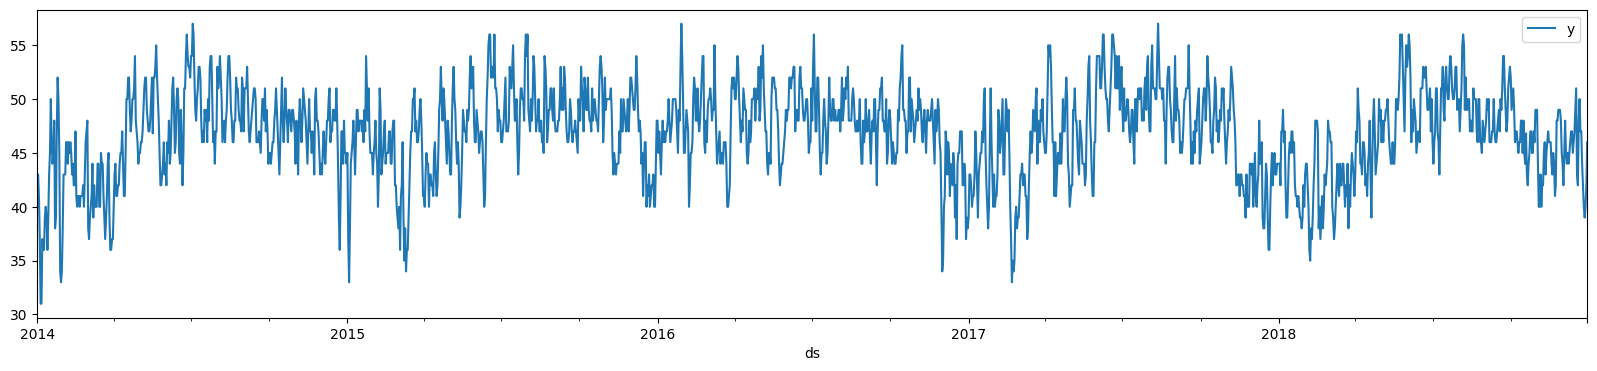

In [12]:
df.plot(x = "ds", y ='y', figsize = (20,4))
plt.show()

In [13]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [14]:
train.shape

(1460, 2)

In [15]:
test.shape

(365, 2)

In [16]:
test

,ds,y
1460,2017-12-31,44.0
1461,2018-01-01,44.0
1462,2018-01-02,44.0
1463,2018-01-03,42.0
1464,2018-01-04,47.0
...,...,...
1820,2018-12-26,40.0
1821,2018-12-27,39.0
1822,2018-12-28,40.0
1823,2018-12-29,42.0


Training the model

In [17]:
model = Prophet()
model.fit(train)
train.tail()

16:07:06 - cmdstanpy - INFO - Chain [1] start processing
16:07:06 - cmdstanpy - INFO - Chain [1] done processing


,ds,y
1455,2017-12-26,44.0
1456,2017-12-27,45.0
1457,2017-12-28,43.0
1458,2017-12-29,43.0
1459,2017-12-30,44.0


we can create future dates/dataframe as well

In [18]:
future_dates = model.make_future_dataframe(periods=365)

In [19]:
future_dates

,ds
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
1820,2018-12-26
1821,2018-12-27
1822,2018-12-28
1823,2018-12-29


Predicting using the model

In [20]:
forecast = model.predict(future_dates)

In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,43.798173,34.694087,43.726608,43.798173,43.798173,-4.543424,-4.543424,-4.543424,-0.059834,-0.059834,-0.059834,-4.483589,-4.483589,-4.483589,0.0,0.0,0.0,39.254749
1,2014-01-02,43.813351,35.515803,43.809625,43.813351,43.813351,-4.238604,-4.238604,-4.238604,0.097827,0.097827,0.097827,-4.336431,-4.336431,-4.336431,0.0,0.0,0.0,39.574747
2,2014-01-03,43.828529,35.864483,44.373009,43.828529,43.828529,-3.742918,-3.742918,-3.742918,0.425980,0.425980,0.425980,-4.168898,-4.168898,-4.168898,0.0,0.0,0.0,40.085611
3,2014-01-04,43.843707,36.033180,44.152553,43.843707,43.843707,-3.976833,-3.976833,-3.976833,0.006752,0.006752,0.006752,-3.983585,-3.983585,-3.983585,0.0,0.0,0.0,39.866874
4,2014-01-05,43.858885,35.631633,44.054855,43.858885,43.858885,-4.023666,-4.023666,-4.023666,-0.240352,-0.240352,-0.240352,-3.783314,-3.783314,-3.783314,0.0,0.0,0.0,39.835220


In [22]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2018-12-26,46.268723,36.589483,45.933933,44.640314,47.885063,-4.887708,-4.887708,-4.887708,-0.059834,-0.059834,-0.059834,-4.827874,-4.827874,-4.827874,0.0,0.0,0.0,41.381015
1821,2018-12-27,46.268103,37.155051,46.372271,44.629025,47.893931,-4.747623,-4.747623,-4.747623,0.097827,0.097827,0.097827,-4.845449,-4.845449,-4.845449,0.0,0.0,0.0,41.520480
1822,2018-12-28,46.267483,37.124213,46.498862,44.621690,47.901471,-4.408644,-4.408644,-4.408644,0.425980,0.425980,0.425980,-4.834623,-4.834623,-4.834623,0.0,0.0,0.0,41.858839
1823,2018-12-29,46.266863,37.235894,45.907895,44.615431,47.908063,-4.788772,-4.788772,-4.788772,0.006752,0.006752,0.006752,-4.795524,-4.795524,-4.795524,0.0,0.0,0.0,41.478091
1824,2018-12-30,46.266242,36.826779,45.838478,44.609333,47.912668,-4.969109,-4.969109,-4.969109,-0.240352,-0.240352,-0.240352,-4.728758,-4.728758,-4.728758,0.0,0.0,0.0,41.297133


In [23]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,39.254749,34.694087,43.726608
1,2014-01-02,39.574747,35.515803,43.809625
2,2014-01-03,40.085611,35.864483,44.373009
3,2014-01-04,39.866874,36.033180,44.152553
4,2014-01-05,39.835220,35.631633,44.054855
...,...,...,...,...
1820,2018-12-26,41.381015,36.589483,45.933933
1821,2018-12-27,41.520480,37.155051,46.372271
1822,2018-12-28,41.858839,37.124213,46.498862
1823,2018-12-29,41.478091,37.235894,45.907895


In [24]:
plot_plotly(model, forecast)

In [25]:
plot_components_plotly(model, forecast)

In [26]:
pred = forecast.iloc[-365:]["yhat"]

In [27]:
pred

1460    41.643579
1461    41.924529
1462    42.007196
1463    42.261397
1464    42.603750
          ...    
1820    41.381015
1821    41.520480
1822    41.858839
1823    41.478091
1824    41.297133
Name: yhat, Length: 365, dtype: float64

In [28]:
rmse = root_mean_squared_error(pred, test["y"])

In [29]:
rmse

3.458617763904657

In [30]:
test["y"].mean()

46.31183227640992